<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./252_Sentinel-3_SLSTR_NRT_FRP_L2_load_browse.ipynb"><< 252 - Sentinel-3 SLSTR NRT - Fire Radiative Power Level 2</a><span style="float:right;"><a href="./261_CAMS_EAC4_OMAOD_load_browse.ipynb">261 - CAMS Global reanalysis - Organic Matter AOD >></a></span>

<div class="alert alert-block alert-success">
<b>20 - DATA EXPLORATION</b></div>

<div class="alert alert-block alert-success">

<b>SEE ALSO</b>

**30 - CASE STUDIES**
 - [313 - Californian fires 2020](../30_case_studies/313_fire_california_2020.ipynb) 
 - [316 - Californian fires 2020 - Sentinel-3 SLSTR NRT - Aerosol Optical Depth - Level 2](../30_case_studies/316_fire_california_2020_Sentinel-3_SLSTR_NRT_AOD_L2.ipynb)

    
**40 - EXERCISES**
 - [423 - Sentinel-3 SLSTR NRT - Aerosol Optical Depth - Level 2 - Exercise](../40_exercises/423_Sentinel-3_SLSTR_NRT_AOD_L2_exercise.ipynb)

</div>

<hr>

# 2.5.3 Copernicus Sentinel-3 SLSTR NRT - Aerosol Optical Depth (AOD) - Level 2

The [Copernicus Sentinel-3 SLSTR Near-Real-Time (NRT) Aerosol Optical Depth (AOD)](https://navigator.eumetsat.int/product/EO:EUM:DAT:0306?query=SLSTR%20Level%202%20Aerosol%20Optical%20Depth%20in%20NRT%20-%20Sentinel-3&s=advanced) product quantifies the abundance of all aerosol particles suspended in the air and monitors their global distribution and long-range transport, at the scale of 9.5 x 9.5 km<sup>2</sup>. Aerosol Optical Depth is often used as a proxy for the amount of aerosols in the air.

The NRT S3 AOD product is only applicable during daytime. The current version of the product is considered as `'preliminary operational'` over ocean surfaces, and `'demonstrational'` over land surfaces.

All these observations are made available in less than three hours from the SLSTR observation sensing time.

The following workflow is based on an example of `Sentinel-3 Near Real Time SLSTR AOD` data on 1 October 2020 in order analyse the amount of aerosols in the air during the Californian fires.
 

#### This module has the following outline:
* [1 - Load Sentinel-3 SLSTR NRT AOD data](#load_cal)
* [2 - Extract AOD variables](#extract_cal)
* [3 - Visualize AOD Ocean and AOD land information](#visualize_cal)

<hr>

#### Load required libraries

In [1]:
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

<hr>

## <a id='load'></a>Load Sentinel-3 SLSTR Near-Real-Time AOD data

The Near-Real-Time Sentinel-3 Aerosol Optical Depth data are disseminated in `netCDF`. `netCDF` data can be loaded with the Python library [xarray](http://xarray.pydata.org/en/stable/) and the function `xr.open_dataset()`. 

You see that the data file contains two `dimensions`:
* `columns` and
* `rows`.

It further contains an long list of `data variables`, including:
* `AOD_550`,
* `AOD_550_uncertainty`,
* `AOD_550_Ocean_NonFiltered`,
* `AOD_550_Land_Experimental_PostFiltered`,
...

A data file also contains a set of `attributes`, which give you more information about the data file and the data it contains, e.g the `start_time` and `stop_time` or the `product_name`.

In [2]:
file = xr.open_dataset('../eodata/sentinel3/slstr/2020/10/01/AOD_California_20201001.nc')
file

<xarray.Dataset>
Dimensions:                                                (rows: 210, columns: 157)
Dimensions without coordinates: rows, columns
Data variables: (12/48)
    AOD_550                                                (rows, columns) float32 ...
    AOD_550_uncertainty                                    (rows, columns) float32 ...
    AOD_670                                                (rows, columns) float32 ...
    AOD_865                                                (rows, columns) float32 ...
    AOD_1600                                               (rows, columns) float32 ...
    AOD_2250                                               (rows, columns) float32 ...
    ...                                                     ...
    relative_azimuth_oblique                               (rows, columns) float32 ...
    cloud_fraction_nadir                                   (rows, columns) float32 ...
    cloud_fraction_oblique                                 (rows, columns) float32 ...
    aod_quality_flags                                      (rows, columns) uint16 ...
    SLN_L1b_quality_flags                                  (rows, columns) uint32 ...
    SLO_L1b_quality_flags                                  (rows, columns) uint32 ...
Attributes: (12/16)
    title:                  Surface directional Reflectance, retrieved and de...
    comment:                 
    netCDF_version:         4.2 of Jul  5 2012 17:07:43 $
    product_name:           S3A_SL_2_AOD____20201001T183400_20201001T183858_2...
    institution:            MAR
    source:                 IPF-SL-2-AOD 02.00
    ...                     ...
    resolution:             [ 9500 9500 ]
    absolute_orbit_number:  24084
    start_time:             2020-10-01T18:33:59.719578Z
    stop_time:              2020-10-01T18:38:57.606044Z
    track_offset:           105
    start_offset:           1660

### <a id='extract'></a>Extract Aerosol Optical Depth variables

The next step is to extract the variables of interest. Let us select the following two variables:
* `AOD_550`: it is the Aerosol Optical Depth at 550nm. (*Note: it only covers ocean surfaces.*)
* `AOD_550_Land_Experimental_PostFiltered`: it is the Aerosol Optical Depth at 550nm. (*Note: it only covers land surfaces.*)

Both `xarray.DataArrays` have two dimensions (`rows` and `columns`) and the following attributes, which provide additional information about the variables:
* `long_name`
* `standard_name`
* `valid_min`
* `valid_max`
* `coordinates`

In [3]:
aod_ocean = file.AOD_550
aod_land = file.AOD_550_Land_Experimental_PostFiltered

print(aod_ocean)
print(' ')
print(aod_land)

<xarray.DataArray 'AOD_550' (rows: 210, columns: 157)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Aerosol optical thickness at 550 nm - Best quality (post-...
    standard_name:  atmosphere_optical_thickness_due_to_ambient_aerosol
    valid_min:      0.0
    valid_max:      4.001
    coordinates:    latitude, longitude
 
<xarray.DataArray 'AOD_550_Land_Experimental_PostFiltered' (rows: 210, columns: 157)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan,

You can also load `latitude` and `longitude` information, which can be used later for visualizing the variables.

In [4]:
lat_nc = file.latitude
lon_nc = file.longitude

print(lat_nc)
print(' ')
print(lon_nc)

<xarray.DataArray 'latitude' (rows: 210, columns: 157)>
array([[40.54374 , 40.533485, 40.523174, ..., 37.763252, 37.73665 , 37.71009 ],
       [40.46065 , 40.45038 , 40.44005 , ..., 37.676662, 37.649994, 37.62782 ],
       [40.377556, 40.367268, 40.35692 , ..., 37.593685, 37.571865, 37.54554 ],
       ...,
       [23.316261, 23.302357, 23.288424, ..., 20.575003, 20.553972, 20.533533],
       [23.232931, 23.21901 , 23.205057, ..., 20.492165, 20.4701  , 20.45003 ],
       [23.1496  , 23.13566 , 23.121693, ..., 20.407766, 20.387156, 20.366516]],
      dtype=float32)
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Latitude at pixel centre
    standard_name:  latitude
    units:          degrees_north
    valid_min:      -90.0
    valid_max:      90.0
 
<xarray.DataArray 'longitude' (rows: 210, columns: 157)>
array([[-132.85818 , -132.74686 , -132.63556 , ..., -116.28708 , -116.182686,
        -116.08103 ],
       [-132.87125 , -132.76007 , -132.6489  , ..., -1

### <a id='visualize'></a> Visualize AOD Ocean and AOD Land variables

The final step is to visualize both variables, Aerosol Optical Depth over ocean and land together in one plot. You can use matplotlib's function `pcolormesh` for it.

Let us define a function called [visualize_s3_aod](../functions.ipynb#visualize_s3_aod) which visualizes both AOD variables together onto a map. The function takes the following keyword arguments (kwargs):
* `aod_ocean`: DataArray with AOD values over ocean
* `aod_land`: DataArray with AOD values over land
* `latitude`: DataArray with latitude information
* `longitude`: DataArray with longitude information
* `title`: Title of the plot
* `unit`: Unit of AOD
* `vmin` and `vmax`: Minimum and maximum values to be displayed on the map
* `color_scale`: Color scale the data shall be represented
* `projection`: Projection of the map

In [5]:
def visualize_s3_aod(aod_ocean, aod_land, latitude, longitude, title, unit, vmin, vmax, color_scale, projection):
    fig=plt.figure(figsize=(12, 12))

    ax=plt.axes(projection=projection)
    ax.coastlines(linewidth=1.5, linestyle='solid', color='k', zorder=10)

    gl = ax.gridlines(draw_labels=True, linestyle='--')
    gl.top_labels=False
    gl.right_labels=False
    gl.xformatter=LONGITUDE_FORMATTER
    gl.yformatter=LATITUDE_FORMATTER
    gl.xlabel_style={'size':12}
    gl.ylabel_style={'size':12}


    img1 = plt.pcolormesh(longitude, latitude, aod_ocean, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap=color_scale)
    img2 = plt.pcolormesh(longitude, latitude, aod_land, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap=color_scale)
    ax.set_title(title, fontsize=20, pad=20.0)

    cbar = fig.colorbar(img1, ax=ax, orientation='vertical', fraction=0.04, pad=0.05)
    cbar.set_label(unit, fontsize=16)
    cbar.ax.tick_params(labelsize=14)

    plt.show()

Now, let us apply the function [visualize_s3_aod](../functions.ipynb#visualize_s3_aod) to visualize both variables, `AOD Ocean` and `AOD Land`.

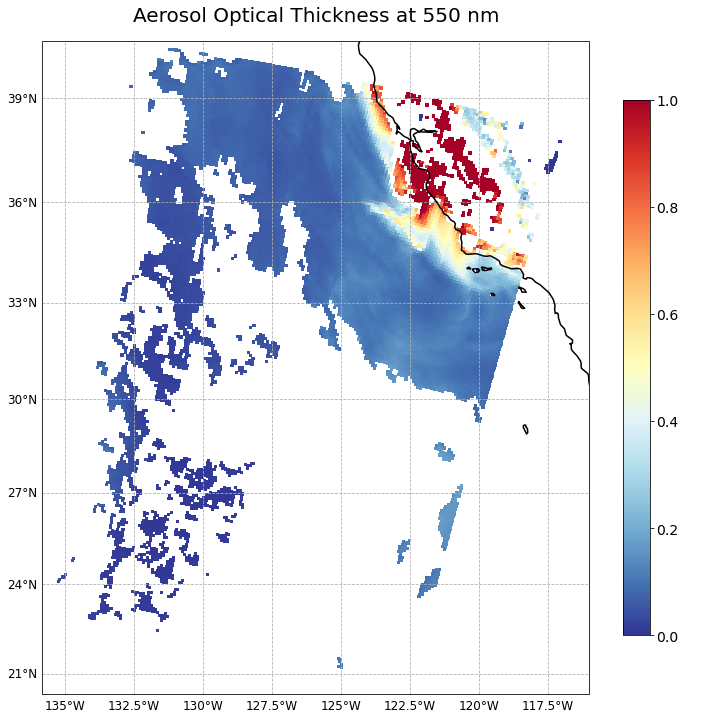

In [6]:
visualize_s3_aod(aod_ocean=aod_ocean, 
                 aod_land=aod_land, 
                 latitude=lat_nc, 
                 longitude=lon_nc, 
                 title='Aerosol Optical Thickness at 550 nm', 
                 unit=' ', 
                 vmin=0.,
                 vmax=1.0,
                 color_scale=cm.RdYlBu_r,
                 projection=ccrs.Mercator())

<br>

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./252_Sentinel-3_SLSTR_NRT_FRP_L2_load_browse.ipynb"><< 252 - Sentinel-3 SLSTR NRT - Fire Radiative Power Level 2</a><span style="float:right;"><a href="./261_CAMS_EAC4_OMAOD_load_browse.ipynb">261 - CAMS Global reanalysis - Organic Matter AOD >></a></span>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>